In [1]:
import numpy as np             
import pandas as pd           
import matplotlib.pyplot as plt 
import seaborn as sns           
import sklearn                  

In [2]:
url = "C:\\Users\\Asus\\Downloads\\all_players.csv"
data_raw = pd.read_csv(url)

In [3]:
data_raw.shape

(17737, 58)

In [4]:
pd.set_option('display.max_columns', None) 

In [5]:
data_raw = data_raw.drop(data_raw.columns[0:3], axis = 1)
data_raw = data_raw.drop(data_raw.columns[8:37], axis = 1)
data_raw = data_raw.drop(data_raw.columns[19:26], axis = 1)
data_raw = data_raw.drop(data_raw.columns[[12, 13, 14]], axis = 1)

In [6]:
data_raw

,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Position,Weak foot,Skill moves,Preferred foot,Age,Nation,League,Team
0,Kylian Mbappé,91,97,90,80,92,36,78,ST,4,5,Right,25,France,LALIGA EA SPORTS,Real Madrid
1,Rodri,91,66,80,86,84,87,85,CDM,4,3,Right,28,Spain,Premier League,Manchester City
2,Erling Haaland,91,88,92,70,81,45,88,ST,3,3,Left,24,Norway,Premier League,Manchester City
3,Jude Bellingham,90,80,87,83,88,78,83,CAM,4,4,Right,21,England,LALIGA EA SPORTS,Real Madrid
4,Vini Jr.,90,95,84,81,91,29,69,LW,4,5,Right,24,Brazil,LALIGA EA SPORTS,Real Madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17732,Araya Dennis,53,42,57,49,52,25,42,ST,3,2,Right,18,England,Barclays WSL,Spurs
17733,Alexia Férnandez,53,53,55,51,53,34,47,LW,3,2,Right,22,Spain,Liga F,Granada CF
17734,Aleigh Gambone,53,60,58,53,56,49,53,CM,4,4,Right,23,United States,Scottish Women's League,Glasgow City FC
17735,Joy Lysser,53,61,52,48,56,53,58,CM,3,2,Left,20,Switzerland,Schweizer Damen Liga,FC Zürich


In [7]:
data_raw.set_index(data_raw.columns[0], inplace = True)

In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17737 entries, Kylian Mbappé to Kateřina Vithová
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OVR             17737 non-null  int64 
 1   PAC             17737 non-null  int64 
 2   SHO             17737 non-null  int64 
 3   PAS             17737 non-null  int64 
 4   DRI             17737 non-null  int64 
 5   DEF             17737 non-null  int64 
 6   PHY             17737 non-null  int64 
 7   Position        17737 non-null  object
 8   Weak foot       17737 non-null  int64 
 9   Skill moves     17737 non-null  int64 
 10  Preferred foot  17737 non-null  object
 11  Age             17737 non-null  int64 
 12  Nation          17737 non-null  object
 13  League          17737 non-null  object
 14  Team            17737 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.2+ MB


In [9]:
data_raw['Position'] = data_raw['Position'].astype('category')
data_raw['Nation'] = data_raw['Nation'].astype('category')
data_raw['Preferred foot'] = data_raw['Preferred foot'].astype('category')
data_raw['League'] = data_raw['League'].astype('category')
data_raw['Team'] = data_raw['Team'].astype('category')

In [10]:
data_raw['Position'].dtype

CategoricalDtype(categories=['CAM', 'CB', 'CDM', 'CM', 'GK', 'LB', 'LM', 'LW', 'RB', 'RM',
                  'RW', 'ST'],
, ordered=False)

In [11]:
data_raw['Nation'].dtype

CategoricalDtype(categories=['Albania', 'Algeria', 'Andorra', 'Angola',
                  'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
                  'Austria', 'Azerbaijan',
                  ...
                  'Ukraine', 'United Arab Emirates', 'United States',
                  'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Wales',
                  'Zambia', 'Zimbabwe'],
, ordered=False)

In [12]:
data_raw['Preferred foot'].dtype

CategoricalDtype(categories=['Left', 'Right'], ordered=False)

In [13]:
data_raw['League'].dtype

CategoricalDtype(categories=['1A Pro League', '3. Liga', '3F Superliga', 'A-League',
                  'Allsvenskan', 'Arkema PL', 'Barclays WSL', 'Bundesliga',
                  'Bundesliga 2', 'CSL', 'CSSL', 'Calcio A Femminile',
                  'Ceska Liga Žen', 'EFL Championship', 'EFL League One',
                  'EFL League Two', 'Eliteserien', 'Eredivisie', 'Finnliiga',
                  'GPFBL', 'Hellas Liga', 'ISL', 'K League 1',
                  'LALIGA EA SPORTS', 'LALIGA HYPERMOTION', 'Libertadores',
                  'Liga Azerbaijan', 'Liga Colombia', 'Liga Cyprus', 'Liga F',
                  'Liga Hrvatska', 'Liga Portugal', 'Liga Portugal Feminino',
                  'Ligue 1 McDonald's', 'Ligue 2 BKT', 'MLS', 'Magyar Liga',
                  'NWSL', 'Nederland Vrouwen Liga', 'PKO BP Ekstraklasa',
                  'Premier League', 'Primera División', 'ROSHN Saudi League',
                  'SSE Airtricity PD', 'SUPERLIGA', 'Schweizer Damen Liga',
               

In [14]:
data_raw['Team'].dtype

CategoricalDtype(categories=['1. FC Köln', '1. FC Magdeburg', '1. FC Nürnberg',
                  '1. FSV Mainz 05', '1860 München', 'AC Ajaccio', 'ADT',
                  'AEK Athens', 'AFC Bournemouth', 'AFC Wimbledon',
                  ...
                  'Wolves', 'Wrexham', 'Wuhan Three Towns', 'Wycombe',
                  'Yverdon Sport FC', 'Zagłębie Lubin', 'Zhejiang Pro',
                  'sc Heerenveen', 'Çaykur Rizespor', 'Śląsk Wrocław'],
, ordered=False)

In [15]:
data_raw.describe()

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Weak foot,Skill moves,Age
count,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000,17737.000000
mean,66.796245,68.237921,54.846197,59.152506,64.205728,51.222473,65.420590,2.947229,2.409201,25.744151
std,7.030997,10.587756,13.858698,9.826691,9.359164,16.477859,9.468368,0.678567,0.793737,4.640097
min,47.000000,29.000000,20.000000,25.000000,29.000000,15.000000,32.000000,1.000000,1.000000,17.000000
25%,62.000000,62.000000,46.000000,53.000000,59.000000,37.000000,59.000000,3.000000,2.000000,22.000000
50%,67.000000,69.000000,57.000000,60.000000,65.000000,55.000000,66.000000,3.000000,2.000000,25.000000
75%,71.000000,75.000000,65.000000,66.000000,70.000000,64.000000,72.000000,3.000000,3.000000,29.000000
max,91.000000,97.000000,93.000000,94.000000,92.000000,91.000000,91.000000,5.000000,5.000000,44.000000


In [16]:
corr_mat = data_raw.corr(numeric_only=True)
corr_mat

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Weak foot,Skill moves,Age
OVR,1.000000,0.286057,0.482466,0.727561,0.706519,0.371327,0.567266,0.202406,0.348946,0.372559
PAC,0.286057,1.000000,0.348670,0.295546,0.521078,-0.197886,-0.057894,0.160783,0.366056,-0.129125
SHO,0.482466,0.348670,1.000000,0.685139,0.780582,-0.388412,0.060388,0.213676,0.320582,0.221268
PAS,0.727561,0.295546,0.685139,1.000000,0.854713,0.170912,0.218966,0.205553,0.338261,0.302632
DRI,0.706519,0.521078,0.780582,0.854713,1.000000,-0.067338,0.110998,0.241983,0.438219,0.181910
DEF,0.371327,-0.197886,-0.388412,0.170912,-0.067338,1.000000,0.482444,-0.003130,0.034928,0.209196
PHY,0.567266,-0.057894,0.060388,0.218966,0.110998,0.482444,1.000000,0.057556,-0.051590,0.422312
Weak foot,0.202406,0.160783,0.213676,0.205553,0.241983,-0.003130,0.057556,1.000000,0.343256,0.051689
Skill moves,0.348946,0.366056,0.320582,0.338261,0.438219,0.034928,-0.051590,0.343256,1.000000,0.042022
Age,0.372559,-0.129125,0.221268,0.302632,0.181910,0.209196,0.422312,0.051689,0.042022,1.000000


In [17]:
data_raw.describe(include=['category'])

,Position,Preferred foot,Nation,League,Team
count,17737,17737,17737,17737,17737
unique,12,2,154,57,685
top,CB,Right,England,Sudamericana,Everton
freq,3185,13601,1590,826,68


In [18]:
data_raw.isnull().sum()

OVR               0
PAC               0
SHO               0
PAS               0
DRI               0
DEF               0
PHY               0
Position          0
Weak foot         0
Skill moves       0
Preferred foot    0
Age               0
Nation            0
League            0
Team              0
dtype: int64

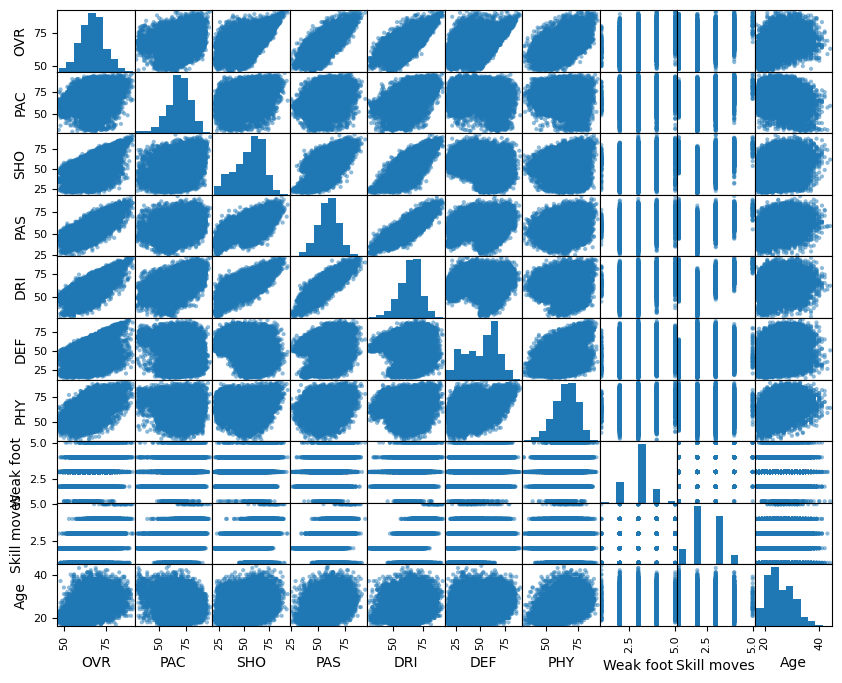

In [19]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 8))
pass

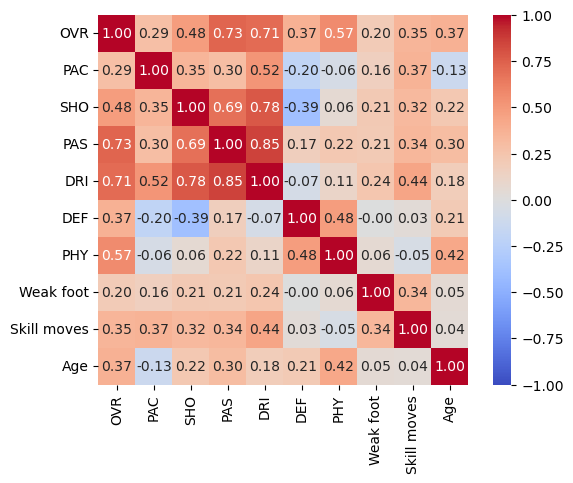

In [20]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

In [21]:
X = data_raw.drop(['OVR', 'Weak foot','Nation'], axis=1)
y = data_raw['OVR']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(13302, 4435)

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(X_train[['Preferred foot', 'Position','League','Team']])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='if_binary', sparse=False, sparse_output=False)

In [24]:
dummies = pd.DataFrame(enc.transform(X_train[['Preferred foot', 'Position','League','Team']]),
                       columns=enc.get_feature_names_out(), index=X_train.index)
dummies.head()

,Preferred foot_Right,Position_CAM,Position_CB,Position_CDM,Position_CM,Position_GK,Position_LB,Position_LM,Position_LW,Position_RB,Position_RM,Position_RW,Position_ST,League_1A Pro League,League_3. Liga,League_3F Superliga,League_A-League,League_Allsvenskan,League_Arkema PL,League_Barclays WSL,League_Bundesliga,League_Bundesliga 2,League_CSL,League_CSSL,League_Calcio A Femminile,League_Ceska Liga Žen,League_EFL Championship,League_EFL League One,League_EFL League Two,League_Eliteserien,League_Eredivisie,League_Finnliiga,League_GPFBL,League_Hellas Liga,League_ISL,League_K League 1,League_LALIGA EA SPORTS,League_LALIGA HYPERMOTION,League_Libertadores,League_Liga Azerbaijan,League_Liga Colombia,League_Liga Cyprus,League_Liga F,League_Liga Hrvatska,League_Liga Portugal,League_Liga Portugal Feminino,League_Ligue 1 McDonald's,League_Ligue 2 BKT,League_MLS,League_Magyar Liga,League_NWSL,League_Nederland Vrouwen Liga,League_PKO BP Ekstraklasa,League_Premier League,League_Primera División,League_ROSHN Saudi League,League_SSE Airtricity PD,League_SUPERLIGA,League_Schweizer Damen Liga,League_Scottish Prem,League_Scottish Women's League,League_Serie A Enilive,League_Serie BKT,League_Sudamericana,League_Sverige Liga,League_Trendyol Süper Lig,League_Ukrayina Liha,League_United Emirates League,League_Ö. Bundesliga,League_Česká Liga,Team_1. FC Köln,Team_1. FC Magdeburg,Team_1. FC Nürnberg,Team_1. FSV Mainz 05,Team_1860 München,Team_AC Ajaccio,Team_ADT,Team_AEK Athens,Team_AFC Bournemouth,Team_AFC Wimbledon,Team_AGF,Team_AIK,Team_AJ Auxerre,Team_APOEL FC,Team_AS Monaco,Team_AS Roma,Team_AS Saint Étienne,Team_AS Saint-Étienne,Team_AVS Futebol SAD,Team_AZ,Team_AaB,Team_Aberdeen,Team_Accrington,Team_Adana Demirspor,Team_Adelaide United,Team_Ajax,Team_Al Ahli,Team_Al Ain FC,Team_Al Fateh,Team_Al Fayha,Team_Al Hilal,Team_Al Ittihad,Team_Al Khaleej,Team_Al Kholood,Team_Al Nassr,Team_Al Okhdood,Team_Al Orobah,Team_Al Qadisiyah,Team_Al Raed,Team_Al Riyadh,Team_Al Shabab,Team_Al Taawoun,Team_Al Wehda,Team_Alanyaspor,Team_Albacete BP,Team_Aleman. Aachen,Team_Alianza FC,Team_Alianza Lima,Team_Almere City FC,Team_Always Ready,Team_Amiens SC,Team_América de Cali,Team_Angel City FC,Team_Angers SCO,Team_Antalyaspor,Team_Argentinos Jrs.,Team_Arminia Bielefeld,Team_Arouca,Team_Arsenal,Team_Aston Villa,Team_Athletic Club,Team_Atl. Nacional,Team_Atlanta United,Team_Atlético Tucumán,Team_Atlético de Madrid,Team_Auckland FC,Team_Austin FC,Team_Austria Klagenfurt,Team_B. Dortmund II,Team_BK Häcken,Team_BSC Young Boys,Team_Banfield,Team_Barcelona SC,Team_Bari,Team_Barnsley,Team_Barracas Central,Team_Barrow,Team_Bay FC,Team_Başakşehir,Team_Beijing FC,Team_Belgrano,Team_Bengaluru FC,Team_Bergamo Calcio,Team_Beşiktaş,Team_Birmingham City,Team_Blackburn Rovers,Team_Blackpool,Team_Blau-Weiss Linz,Team_Boavista FC,Team_Boca Juniors,Team_Bodrum FK,Team_Bohemians,Team_Bologna,Team_Bolton,Team_Bolívar,Team_Borussia Dortmund,Team_Bradford City,Team_Braunschweig,Team_Brentford,Team_Brescia,Team_Brighton,Team_Brisbane Roar,Team_Bristol City,Team_Bristol Rovers,Team_Bromley FC,Team_Brommapojkarna,Team_Brøndby IF,Team_Burgos CF,Team_Burnley,Team_Burton Albion,Team_CA Osasuna,Team_CD Castellón,Team_CD Eldense,Team_CD Leganés,Team_CD Mirandés,Team_CD Tenerife,Team_CF Montréal,Team_CFR 1907 Cluj,Team_Cagliari,Team_Cambridge Utd,Team_Cangzhou FC,Team_Carabobo FC,Team_Caracas FC,Team_Cardiff City,Team_Carl Zeiss Jena,Team_Carlisle United,Team_Carrarese Calcio,Team_Casa Pia AC,Team_Catanzaro,Team_Celtic,Team_Central Coast,Team_Central Córdoba,Team_Cercle Brugge,Team_Cerro Largo,Team_Cerro Porteño,Team_Cesena,Team_Changchun Yatai,Team_Charlotte FC,Team_Charlton Ath,Team_Chelsea,Team_Cheltenham Town,Team_Chennaiyin FC,Team_Chesterfield,Team_Chicago Fire FC,Team_Chicago Red Stars,Team_Cittadella,Team_Clermont Foot 63,Team_Club Brugge,Team_Club Nacional,Team_Cobresal,Team_Colchester,Team_Colo-Colo,Team_Colorado Rapids,Team_Columbus Crew,Team_Como,Team_Coquimbo Unido,Team_Cosenza,Team_Cove

In [25]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['Preferred foot', 'Position','League','Team'], axis=1)
X_train

,PAC,SHO,PAS,DRI,DEF,PHY,Skill moves,Age,Preferred foot_Right,Position_CAM,Position_CB,Position_CDM,Position_CM,Position_GK,Position_LB,Position_LM,Position_LW,Position_RB,Position_RM,Position_RW,Position_ST,League_1A Pro League,League_3. Liga,League_3F Superliga,League_A-League,League_Allsvenskan,League_Arkema PL,League_Barclays WSL,League_Bundesliga,League_Bundesliga 2,League_CSL,League_CSSL,League_Calcio A Femminile,League_Ceska Liga Žen,League_EFL Championship,League_EFL League One,League_EFL League Two,League_Eliteserien,League_Eredivisie,League_Finnliiga,League_GPFBL,League_Hellas Liga,League_ISL,League_K League 1,League_LALIGA EA SPORTS,League_LALIGA HYPERMOTION,League_Libertadores,League_Liga Azerbaijan,League_Liga Colombia,League_Liga Cyprus,League_Liga F,League_Liga Hrvatska,League_Liga Portugal,League_Liga Portugal Feminino,League_Ligue 1 McDonald's,League_Ligue 2 BKT,League_MLS,League_Magyar Liga,League_NWSL,League_Nederland Vrouwen Liga,League_PKO BP Ekstraklasa,League_Premier League,League_Primera División,League_ROSHN Saudi League,League_SSE Airtricity PD,League_SUPERLIGA,League_Schweizer Damen Liga,League_Scottish Prem,League_Scottish Women's League,League_Serie A Enilive,League_Serie BKT,League_Sudamericana,League_Sverige Liga,League_Trendyol Süper Lig,League_Ukrayina Liha,League_United Emirates League,League_Ö. Bundesliga,League_Česká Liga,Team_1. FC Köln,Team_1. FC Magdeburg,Team_1. FC Nürnberg,Team_1. FSV Mainz 05,Team_1860 München,Team_AC Ajaccio,Team_ADT,Team_AEK Athens,Team_AFC Bournemouth,Team_AFC Wimbledon,Team_AGF,Team_AIK,Team_AJ Auxerre,Team_APOEL FC,Team_AS Monaco,Team_AS Roma,Team_AS Saint Étienne,Team_AS Saint-Étienne,Team_AVS Futebol SAD,Team_AZ,Team_AaB,Team_Aberdeen,Team_Accrington,Team_Adana Demirspor,Team_Adelaide United,Team_Ajax,Team_Al Ahli,Team_Al Ain FC,Team_Al Fateh,Team_Al Fayha,Team_Al Hilal,Team_Al Ittihad,Team_Al Khaleej,Team_Al Kholood,Team_Al Nassr,Team_Al Okhdood,Team_Al Orobah,Team_Al Qadisiyah,Team_Al Raed,Team_Al Riyadh,Team_Al Shabab,Team_Al Taawoun,Team_Al Wehda,Team_Alanyaspor,Team_Albacete BP,Team_Aleman. Aachen,Team_Alianza FC,Team_Alianza Lima,Team_Almere City FC,Team_Always Ready,Team_Amiens SC,Team_América de Cali,Team_Angel City FC,Team_Angers SCO,Team_Antalyaspor,Team_Argentinos Jrs.,Team_Arminia Bielefeld,Team_Arouca,Team_Arsenal,Team_Aston Villa,Team_Athletic Club,Team_Atl. Nacional,Team_Atlanta United,Team_Atlético Tucumán,Team_Atlético de Madrid,Team_Auckland FC,Team_Austin FC,Team_Austria Klagenfurt,Team_B. Dortmund II,Team_BK Häcken,Team_BSC Young Boys,Team_Banfield,Team_Barcelona SC,Team_Bari,Team_Barnsley,Team_Barracas Central,Team_Barrow,Team_Bay FC,Team_Başakşehir,Team_Beijing FC,Team_Belgrano,Team_Bengaluru FC,Team_Bergamo Calcio,Team_Beşiktaş,Team_Birmingham City,Team_Blackburn Rovers,Team_Blackpool,Team_Blau-Weiss Linz,Team_Boavista FC,Team_Boca Juniors,Team_Bodrum FK,Team_Bohemians,Team_Bologna,Team_Bolton,Team_Bolívar,Team_Borussia Dortmund,Team_Bradford City,Team_Braunschweig,Team_Brentford,Team_Brescia,Team_Brighton,Team_Brisbane Roar,Team_Bristol City,Team_Bristol Rovers,Team_Bromley FC,Team_Brommapojkarna,Team_Brøndby IF,Team_Burgos CF,Team_Burnley,Team_Burton Albion,Team_CA Osasuna,Team_CD Castellón,Team_CD Eldense,Team_CD Leganés,Team_CD Mirandés,Team_CD Tenerife,Team_CF Montréal,Team_CFR 1907 Cluj,Team_Cagliari,Team_Cambridge Utd,Team_Cangzhou FC,Team_Carabobo FC,Team_Caracas FC,Team_Cardiff City,Team_Carl Zeiss Jena,Team_Carlisle United,Team_Carrarese Calcio,Team_Casa Pia AC,Team_Catanzaro,Team_Celtic,Team_Central Coast,Team_Central Córdoba,Team_Cercle Brugge,Team_Cerro Largo,Team_Cerro Porteño,Team_Cesena,Team_Changchun Yatai,Team_Charlotte FC,Team_Charlton Ath,Team_Chelsea,Team_Cheltenham Town,Team_Chennaiyin FC,Team_Chesterfield,Team_Chicago Fire FC,Team_Chicago Red Stars,Team_Cittadella,Team_Clermont Foot 63,Team_Club Brugge,Team_Club Nacional,Team_Cobresal,Team_Colchester,Team_Colo-Colo,Team_Colorado Rapids,Team_Columbus Crew,Team_Como,Te

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_train

PAC       SHO       PAS       DRI       DEF       PHY  \
Name                                                                           
Sebastian Quirk   0.167926 -0.207424 -0.327928 -0.348359 -0.018275 -1.305366   
Fernando Alarcón -1.525878 -1.580320 -1.451575 -2.923331  1.321409  0.802860   
Joshué Quiñonez  -0.961277 -1.724835 -0.736527 -1.421264  0.895146  0.064981   
Guido Villar     -0.020274  0.731925  0.591420  0.509965 -2.027801  0.064981   
Dawid Abramowicz  0.638427  0.226122  0.489270 -0.992102  0.468883  1.435328   
...                    ...       ...       ...       ...       ...       ...   
Ethan Mbappé     -0.678976 -0.062909  0.591420  0.080803  0.347094 -1.727012   
Gavan Holohan    -0.020274  0.226122 -0.021479 -0.133778  0.164409  0.275803   
Park Seung Wook   1.014828 -0.930001  0.182821 -0.241069  0.773357  1.435328   
Thijs Dallinga    0.356126  1.599017  0.591420  0.831836 -1.297064  0.170392   
Dylan Lawlor     -0.867177 -2.230638 -2.881672 -3.137912  0.225304 -1.094544   

                  Skill moves       Age  Preferred foot_Right  Position_CAM  \
Name                                                                          
Sebastian Quirk     -0.523250 -0.807619              0.554250      -0.24992   
Fernando Alarcón    -0.523250  0.912905             -1.804239      -0.24992   
Joshué Quiñonez     -0.523250 -0.592554              0.554250      -0.24992   
Guido Villar        -1.785539  0.697839              0.554250      -0.24992   
Dawid Abramowicz    -0.523250  1.558101             -1.804239      -0.24992   
...                       ...       ...                   ...           ...   
Ethan Mbappé         0.739040 -1.882947             -1.804239      -0.24992   
Gavan Holohan        0.739040  1.343036              0.554250      -0.24992   
Park Seung Wook      0.739040  0.267708              0.554250      -0.24992   
Thijs Dallinga      -0.523250 -0.377488              0.554250      -0.24992   
Dylan Lawlor        -0.523250 -1.667882              0.554250      -0.24992   

                  Position_CB  Position_CDM  Position_CM  Position_GK  \
Name                                                                    
Sebastian Quirk     -0.466568     -0.300695     2.696737    -0.353150   
Fernando Alarcón     2.143310     -0.300695    -0.370819    -0.353150   
Joshué Quiñonez      2.143310     -0.300695    -0.370819    -0.353150   
Guido Villar        -0.466568     -0.300695    -0.370819     2.831661   
Dawid Abramowicz    -0.466568     -0.300695    -0.370819    -0.353150   
...                       ...           ...          ...          ...   
Ethan Mbappé        -0.466568     -0.300695     2.696737    -0.353150   
Gavan Holohan       -0.466568     -0.300695     2.696737    -0.353150   
Park Seung Wook     -0.466568     -0.300695    -0.370819    -0.353150   
Thijs Dallinga      -0.466568     -0.300695    -0.370819    -0.353150   
Dylan Lawlor         2.143310     -0.300695    -0.370819    -0.353150   

                  Position_LB  Position_LM  Position_LW  Position_RB  \
Name                                                                   
Sebastian Quirk     -0.287569     -0.24907     -0.15112    -0.292897   
Fernando Alarcón    -0.287569     -0.24907     -0.15112    -0.292897   
Joshué Quiñonez     -0.287569     -0.24907     -0.15112    -0.292897   
Guido Villar        -0.287569     -0.24907     -0.15112    -0.292897   
Dawid Abramowicz     3.477430     -0.24907     -0.15112    -0.292897   
...                       ...          ...          ...          ...   
Ethan Mbappé        -0.287569     -0.24907     -0.15112    -0.292897   
Gavan Holohan       -0.287569     -0.24907     -0.15112    -0.292897   
Park Seung Wook     -0.287569     -0.24907     -0.15112     3.414164   
Thijs Dallinga      -0.287569     -0.24907     -0.15112    -0.292897   
Dylan Lawlor        -0.287569     -0.24907     -0.15112    -0.292897   

                  Position_RM  Position_RW  Position_ST  League_1A 

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_train

Name
Sebastian Quirk     55
Fernando Alarcón    71
Joshué Quiñonez     66
Guido Villar        68
Dawid Abramowicz    66
                    ..
Ethan Mbappé        63
Gavan Holohan       62
Park Seung Wook     69
Thijs Dallinga      77
Dylan Lawlor        52
Name: OVR, Length: 13302, dtype: int64

In [28]:
y_train_predict

array([57.40191794, 62.05719137, 65.24591208, ..., 68.00543356,
       72.53863669, 52.68902731])

In [29]:
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

(4.786932908253311, 2.1879060556279173)

In [30]:
dummies = pd.DataFrame(enc.transform(X_test[['Preferred foot', 'Position','League','Team']]),
                       columns=enc.get_feature_names_out(), index=X_test.index)
X_test = pd.concat((X_test, dummies), axis=1).drop(['Preferred foot', 'Position','League','Team'], axis=1)


X_test = pd.DataFrame(scaler.transform(X_test),
                      columns=X_test.columns, index=X_test.index)

In [31]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(4.786932908253311, 5.346168961118242, 0.9031735116573297, 0.8918058915774603)

In [33]:
model.score(X_train, y_train)

0.9031735116573297

In [34]:
model.score(X_test, y_test)

0.8918058915774603

In [35]:
MSE_train = ((y_train_predict - y_train)**2).mean()
MSE_test  = ((y_test_predict - y_test)**2).mean()
MSE_train, MSE_test

(4.786932908253311, 5.346168961118242)

In [36]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

(2.1879060556279173, 2.3121784016632976)

In [37]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['Linear Regression, all features', :] = (RMSE_train, RMSE_test)

In [38]:
RMSE_table

,train,test
"Linear Regression, all features",2.187906,2.312178


In [39]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['Linear Regression, all features', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.903174,0.891806


In [40]:
model = LinearRegression()
model.fit(X_train[['PAC', 'SHO','PAS','DRI','DEF','PHY']], y_train)

y_train_predict = model.predict(X_train[['PAC', 'SHO','PAS','DRI','DEF','PHY']])
y_test_predict  = model.predict(X_test[['PAC', 'SHO','PAS','DRI','DEF','PHY']])

In [41]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [42]:
RMSE_table.loc['Linear Regression, stat', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",2.187906,2.312178
"Linear Regression, stat",3.256886,3.248325


In [43]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, stat', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.903174,0.891806
"Linear Regression, stat",0.785443,0.78646


In [44]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [45]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [46]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [47]:
RMSE_table.loc['Random Forest', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",2.187906,2.312178
"Linear Regression, stat",3.256886,3.248325
Random Forest,0.441749,1.209371


In [48]:
R2_table.loc['Random Forest', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.903174,0.891806
"Linear Regression, stat",0.785443,0.78646
Random Forest,0.996053,0.970401


In [49]:
importances = model.feature_importances_
importances

array([9.64667608e-03, 5.90803476e-02, 2.15842624e-02, 5.79764059e-01,
       2.81209109e-01, 3.17857059e-02, 7.07659393e-04, 2.65828746e-03,
       3.94267334e-04, 2.25376906e-04, 3.49271399e-04, 2.26356047e-04,
       1.00164047e-03, 1.92250561e-04, 2.55314876e-04, 2.46153965e-04,
       6.61024841e-05, 3.18601353e-04, 3.13592812e-04, 5.64161132e-05,
       2.86091814e-04, 9.17470411e-05, 9.96072634e-05, 7.15442810e-05,
       3.75185182e-05, 8.28122981e-05, 6.58565001e-05, 7.12225263e-05,
       9.36249842e-05, 1.16398543e-04, 9.80245283e-05, 7.59424531e-05,
       1.28408619e-05, 1.11144065e-05, 1.03290257e-04, 8.92795381e-05,
       1.43882724e-04, 5.09868115e-05, 7.74904672e-05, 3.80532596e-06,
       1.82780956e-04, 2.32278593e-05, 8.37629018e-05, 1.31006950e-04,
       1.46707282e-04, 9.27895116e-05, 1.23207938e-04, 1.84116997e-06,
       1.46221735e-05, 4.78369347e-06, 8.48873818e-05, 1.23105129e-05,
       7.58888556e-05, 4.70626882e-06, 7.35878782e-05, 6.13595146e-05,
      

In [50]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

DRI                   5.797641e-01
DEF                   2.812091e-01
SHO                   5.908035e-02
PHY                   3.178571e-02
PAS                   2.158426e-02
                          ...     
Team_LDU Quito        9.469072e-07
Team_Dep. Riestra     8.319138e-07
Team_Rayo Zuliano     7.377429e-07
Team_Mohammedan SC    7.037646e-07
Team_Carabobo FC      6.515868e-07
Length: 763, dtype: float64

# Выводы 


Использование линейной регрессии даёт хороший результат. Самую важную роль играют характеристики игрока: pac(скорость), sho(удар), pas(пас), dri(дриблинг), def(защита), phy(физика), так как эти характеристики имеют самые большие значения коэффициента корреляции, но и другие признаки тоже нужны для более точного анализа игрока. Случайный лес даёт результат ещё лучше.